### 單日資料 

**先看看有哪些資料，這邊先以提取單天資料特徵為例**

In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加載數據
df = pd.read_csv('./data/2023-12-23 event_flowring_data.csv')

# 基本數據探索
print(df.head())


                     timestamp  \
0  2023-12-23T13:14:16.588791Z   
1  2023-12-23T13:14:16.589093Z   
2  2023-12-23T13:14:16.589208Z   
3  2023-12-23T13:14:16.591191Z   
4  2023-12-23T13:14:16.591441Z   

                                            deviceid  \
0  chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...   
1  chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...   
2  chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...   
3  chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...   
4  chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...   

                               signature      source_ip  source_port  \
0  GPL MISC UPnP malformed advertisement  192.168.0.143         1900   
1  GPL MISC UPnP malformed advertisement  192.168.0.143         1900   
2  GPL MISC UPnP malformed advertisement  192.168.0.143         1900   
3  GPL MISC UPnP malformed advertisement  192.168.0.143         1900   
4  GPL MISC UPnP malformed advertisement  192.168.0.143         1900   

    destination_ip  desti

時間特徵

In [71]:
import pandas as pd

# 轉換 timestamp 為 datetime 對象，並提取相關特徵
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

df

,timestamp,deviceid,signature,source_ip,source_port,destination_ip,destination_port,event_name,severity,hour,minute
0,2023-12-23 13:14:16.588791+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14
1,2023-12-23 13:14:16.589093+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14
2,2023-12-23 13:14:16.589208+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14
3,2023-12-23 13:14:16.591191+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14
4,2023-12-23 13:14:16.591441+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14
...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-12-23 05:28:06.096460+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28
9996,2023-12-23 05:28:26.094568+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28
9997,2023-12-23 05:29:11.093803+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,29
9998,2023-12-23 05:28:46.096123+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28


對類別資料做標記

In [72]:
from sklearn.preprocessing import LabelEncoder

# 為 deviceid 和 signature 創建獨立的 LabelEncoder 實例
deviceid_encoder = LabelEncoder()
signature_encoder = LabelEncoder()

df['deviceid_encoded'] = deviceid_encoder.fit_transform(df['deviceid'])
df['signature_encoded'] = signature_encoder.fit_transform(df['signature'])

# 顯示 deviceid 
print("Device ID classes:", list(deviceid_encoder.classes_))
print("Device ID encoded values:",
      deviceid_encoder.transform(deviceid_encoder.classes_))

# 顯示 signature 
print("Signature classes:", list(signature_encoder.classes_))
print("Signature encoded values:",
      signature_encoder.transform(signature_encoder.classes_))

Device ID classes: ['chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257c804', 'chr2.flowring.96c389c0-10ff-5ea7-a4db-0f712b14151a', 'chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e2127', 'chr2.flowring.fa08a933-73a5-5ac7-8996-b95a2a3cc345']
Device ID encoded values: [0 1 2 3]
Signature classes: ['ET P2P ThunderNetwork UDP Traffic', 'ET POLICY DNS Query for TOR Hidden Domain .onion Accessible Via TOR', 'ET POLICY HTTP traffic on port 443 (POST)', 'ET POLICY SSL/TLS Certificate Observed (AnyDesk Remote Desktop Software)', 'ET POLICY Windows Update P2P Activity', 'ET POLICY iTunes User Agent', 'ET USER_AGENTS Microsoft Device Metadata Retrieval Client User-Agent', 'GPL MISC UPnP malformed advertisement', 'GPL SNMP public access udp']
Signature encoded values: [0 1 2 3 4 5 6 7 8]


對IP做特徵提取

In [73]:
import ipaddress
import pandas as pd

def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return None

df['source_ip_encoded'] = df['source_ip'].apply(ip_to_int)
df['destination_ip_encoded'] = df['destination_ip'].apply(ip_to_int)


def categorize_ip_class(ip):
    if ip.startswith('10.'):
        return 'Class A Private'
    elif ip.startswith('172.'):  
        return 'Class B Private'
    elif ip.startswith('192.168.'):
        return 'Class C Private'
    else:
        return 'Public'


df['source_ip_class'] = df['source_ip'].apply(categorize_ip_class)
df['destination_ip_class'] = df['destination_ip'].apply(categorize_ip_class)


df

,timestamp,deviceid,signature,source_ip,source_port,destination_ip,destination_port,event_name,severity,hour,minute,deviceid_encoded,signature_encoded,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class
0,2023-12-23 13:14:16.588791+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public
1,2023-12-23 13:14:16.589093+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public
2,2023-12-23 13:14:16.589208+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public
3,2023-12-23 13:14:16.591191+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public
4,2023-12-23 13:14:16.591441+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-12-23 05:28:06.096460+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public
9996,2023-12-23 05:28:26.094568+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public
9997,2023-12-23 05:29:11.093803+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,29,0,7,3232238185,4026531834,Class B/C Private,Public
9998,2023-12-23 05:28:46.096123+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public


對Port做特徵提取

In [74]:
import pandas as pd

def classify_port(port):
    common_ports = [20, 21, 22, 23, 25, 53, 80, 110, 443]  # 常見端口列表
    if port in common_ports:
        return 'common_port'
    else:
        return 'high_port'


# 應用分類函數到端口號
df['source_port_type'] = df['source_port'].apply(classify_port)
df['destination_port_type'] = df['destination_port'].apply(classify_port)

# 查看分類結果
print(df[['source_port', 'source_port_type',
      'destination_port', 'destination_port_type']].head())

df

   source_port source_port_type  destination_port destination_port_type
0         1900        high_port              1900             high_port
1         1900        high_port              1900             high_port
2         1900        high_port              1900             high_port
3         1900        high_port              1900             high_port
4         1900        high_port              1900             high_port


,timestamp,deviceid,signature,source_ip,source_port,destination_ip,destination_port,event_name,severity,hour,minute,deviceid_encoded,signature_encoded,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class,source_port_type,destination_port_type
0,2023-12-23 13:14:16.588791+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port
1,2023-12-23 13:14:16.589093+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port
2,2023-12-23 13:14:16.589208+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port
3,2023-12-23 13:14:16.591191+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port
4,2023-12-23 13:14:16.591441+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-12-23 05:28:06.096460+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port
9996,2023-12-23 05:28:26.094568+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port
9997,2023-12-23 05:29:11.093803+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,29,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port
9998,2023-12-23 05:28:46.096123+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port


對嚴重等級做特徵提取

In [75]:
df['severity_level'] = df['severity']

df

,timestamp,deviceid,signature,source_ip,source_port,destination_ip,destination_port,event_name,severity,hour,minute,deviceid_encoded,signature_encoded,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class,source_port_type,destination_port_type,severity_level
0,2023-12-23 13:14:16.588791+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port,2
1,2023-12-23 13:14:16.589093+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port,2
2,2023-12-23 13:14:16.589208+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port,2
3,2023-12-23 13:14:16.591191+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port,2
4,2023-12-23 13:14:16.591441+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,14,2,7,3232235663,4026531834,Class B/C Private,Public,high_port,high_port,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-12-23 05:28:06.096460+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port,2
9996,2023-12-23 05:28:26.094568+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port,2
9997,2023-12-23 05:29:11.093803+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,29,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port,2
9998,2023-12-23 05:28:46.096123+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,28,0,7,3232238185,4026531834,Class B/C Private,Public,high_port,high_port,2


分析不同類型 IP 和端口之間的關聯

In [76]:
# 函數來判斷 IP 地址是否為私有
def is_private_ip(ip):
    if ip.startswith('10.') or ip.startswith('192.168.'):
        return 'Private'
    else:
        return 'Public'

# 函數來判斷端口類型


def port_type(port):
    common_ports = [20, 21, 22, 23, 25, 53, 80, 110, 443]
    return 'Common' if port in common_ports else 'High'


# 假設 source_ip 和 destination_ip 已經轉換為字符串格式
df['source_ip_type'] = df['source_ip'].apply(is_private_ip)
df['destination_ip_type'] = df['destination_ip'].apply(is_private_ip)

# 假設 source_port 和 destination_port 已經是整數或可以直接應用函數
df['source_port_type'] = df['source_port'].apply(port_type)
df['destination_port_type'] = df['destination_port'].apply(port_type)

# 確認新列已正確添加
print(df[['source_ip', 'source_ip_type', 'source_port', 'source_port_type']].head())

df

       source_ip source_ip_type  source_port source_port_type
0  192.168.0.143        Private         1900             High
1  192.168.0.143        Private         1900             High
2  192.168.0.143        Private         1900             High
3  192.168.0.143        Private         1900             High
4  192.168.0.143        Private         1900             High


,timestamp,deviceid,signature,source_ip,source_port,destination_ip,destination_port,event_name,severity,hour,...,signature_encoded,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class,source_port_type,destination_port_type,severity_level,source_ip_type,destination_ip_type
0,2023-12-23 13:14:16.588791+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,...,7,3232235663,4026531834,Class B/C Private,Public,High,High,2,Private,Public
1,2023-12-23 13:14:16.589093+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,...,7,3232235663,4026531834,Class B/C Private,Public,High,High,2,Private,Public
2,2023-12-23 13:14:16.589208+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,...,7,3232235663,4026531834,Class B/C Private,Public,High,High,2,Private,Public
3,2023-12-23 13:14:16.591191+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,...,7,3232235663,4026531834,Class B/C Private,Public,High,High,2,Private,Public
4,2023-12-23 13:14:16.591441+00:00,chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e...,GPL MISC UPnP malformed advertisement,192.168.0.143,1900,239.255.255.250,1900,nids,2,13,...,7,3232235663,4026531834,Class B/C Private,Public,High,High,2,Private,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-12-23 05:28:06.096460+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,...,7,3232238185,4026531834,Class B/C Private,Public,High,High,2,Private,Public
9996,2023-12-23 05:28:26.094568+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,...,7,3232238185,4026531834,Class B/C Private,Public,High,High,2,Private,Public
9997,2023-12-23 05:29:11.093803+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,...,7,3232238185,4026531834,Class B/C Private,Public,High,High,2,Private,Public
9998,2023-12-23 05:28:46.096123+00:00,chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...,GPL MISC UPnP malformed advertisement,192.168.10.105,64964,239.255.255.250,1900,nids,2,5,...,7,3232238185,4026531834,Class B/C Private,Public,High,High,2,Private,Public


時間分析

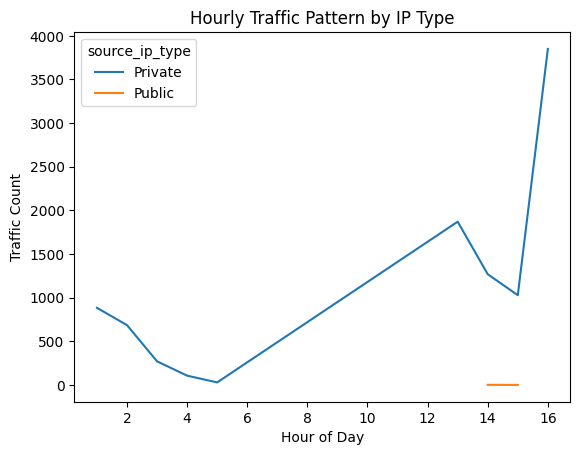

In [77]:
# 按小時和 IP 類型分析流量
hourly_traffic = df.groupby(['hour', 'source_ip_type']).size().unstack()
hourly_traffic.plot(kind='line')
plt.title('Hourly Traffic Pattern by IP Type')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Count')
plt.show()

端口和事件的關係分析

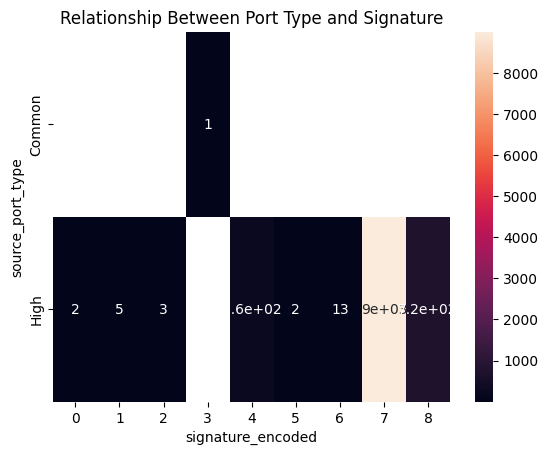

In [78]:
import seaborn as sns
# 分析端口類型和簽名的關係
port_signature_relation = df.groupby(
    ['source_port_type', 'signature_encoded']).size().unstack()
sns.heatmap(port_signature_relation, annot=True)
plt.title('Relationship Between Port Type and Signature')
plt.show()

 聚類分析

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



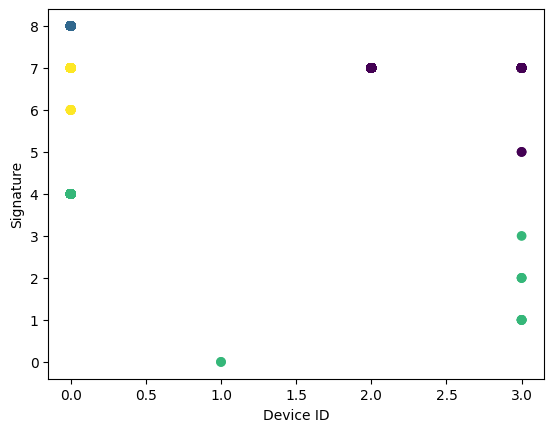

In [79]:
# 將分類特徵轉換為數字代碼
labelencoder = LabelEncoder()
df['deviceid_encoded'] = labelencoder.fit_transform(df['deviceid'])
df['signature_encoded'] = labelencoder.fit_transform(df['signature'])


# 使用 KMeans 進行聚類
kmeans = KMeans(n_clusters=4)
df['cluster'] = kmeans.fit_predict(
    df[['deviceid_encoded', 'signature_encoded']])

# 可視化結果
plt.scatter(df['deviceid_encoded'], df['signature_encoded'], c=df['cluster'])
plt.xlabel('Device ID')
plt.ylabel('Signature')
plt.show()

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\skle

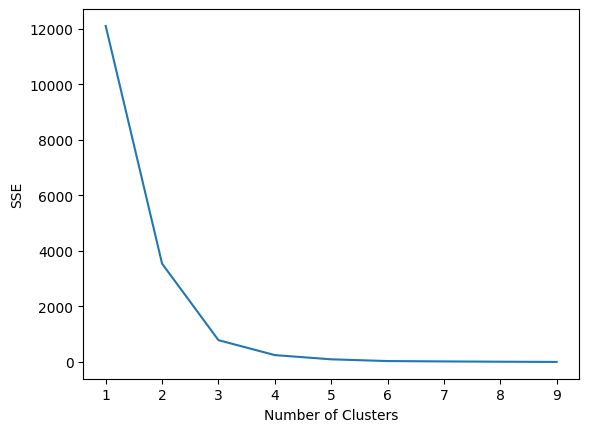

In [80]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['deviceid_encoded', 'signature_encoded']])
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [81]:
from sklearn.ensemble import IsolationForest

# 使用 Isolation Forest 進行異常檢測
iso_forest = IsolationForest(n_estimators=100)
anomalies = iso_forest.fit_predict(
    df[['deviceid_encoded', 'signature_encoded']])
df['anomaly'] = anomalies

# 篩選出異常數據
anomaly_df = df[df['anomaly'] == -1]
print(anomaly_df)

                            timestamp  \
6    2023-12-23 13:14:02.907466+00:00   
7    2023-12-23 13:14:43.201470+00:00   
8    2023-12-23 13:15:23.455318+00:00   
9    2023-12-23 13:16:06.734118+00:00   
10   2023-12-23 13:16:36.742385+00:00   
...                               ...   
9986 2023-12-23 05:26:18.816787+00:00   
9988 2023-12-23 05:26:48.824968+00:00   
9991 2023-12-23 05:28:48.885263+00:00   
9993 2023-12-23 05:29:18.900630+00:00   
9994 2023-12-23 05:28:18.870258+00:00   

                                               deviceid  \
6     chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...   
7     chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...   
8     chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...   
9     chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...   
10    chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...   
...                                                 ...   
9986  chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257...   
9988  chr2.flowring.603feae8-3c1e-5

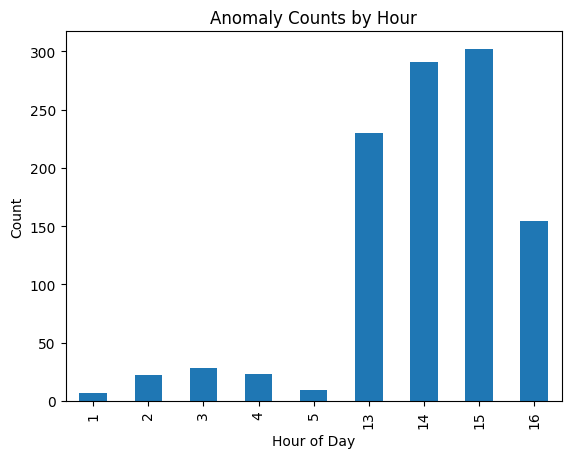

In [82]:
# 提取時間特徵
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

# 分析不同時間的異常分佈
anomaly_counts = anomaly_df.groupby('hour').size()
anomaly_counts.plot(kind='bar')
plt.title('Anomaly Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

In [83]:
anomaly_data = df[df['anomaly'] == -1]
normal_data = df[df['anomaly'] == 1]
# 分析特定特徵
print(anomaly_data['deviceid'].value_counts())
print(normal_data['deviceid'].value_counts())

deviceid
chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257c804    992
chr2.flowring.fa08a933-73a5-5ac7-8996-b95a2a3cc345     72
chr2.flowring.96c389c0-10ff-5ea7-a4db-0f712b14151a      2
Name: count, dtype: int64
deviceid
chr2.flowring.b2ea6dfd-cc5a-58c7-94e5-f5a4e51e2127    6884
chr2.flowring.603feae8-3c1e-5620-a3fa-745c8257c804    2050
Name: count, dtype: int64


C:\Users\Tommy\AppData\Local\Temp\ipykernel_11968\2058284195.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



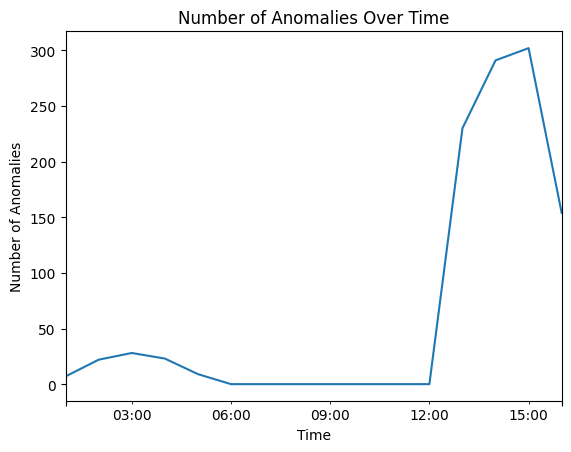

In [84]:
anomaly_data['timestamp'] = pd.to_datetime(anomaly_data['timestamp'])
anomaly_data.set_index('timestamp', inplace=True)

# 繪製時間序列圖
anomaly_data.resample('H').size().plot()
plt.title('Number of Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Anomalies')
plt.show()

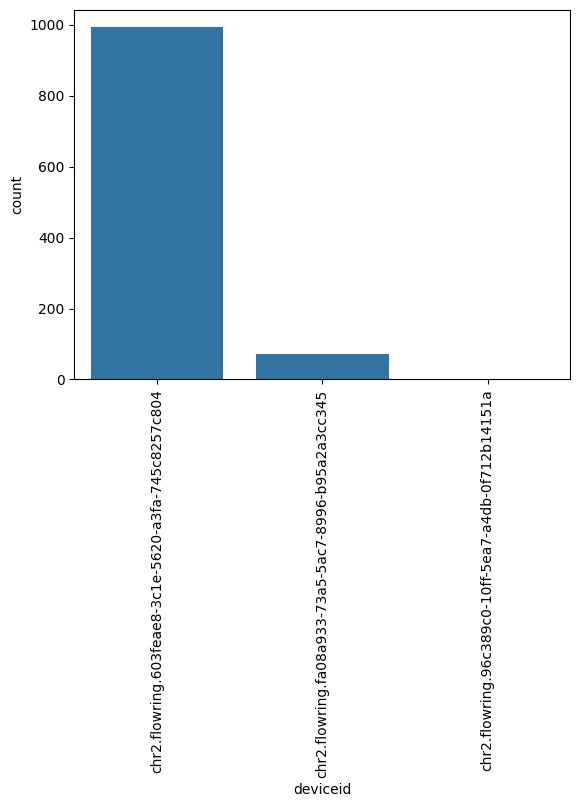

In [85]:
import seaborn as sns

sns.countplot(data=anomaly_data, x='deviceid')
plt.xticks(rotation=90)
plt.show()

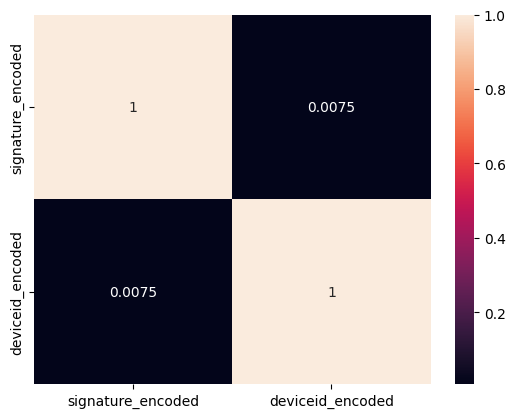

In [86]:
# 特徵關聯分析
correlation_matrix = df[['signature_encoded', 'deviceid_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [87]:
from sklearn.preprocessing import LabelEncoder

# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 對端口類型進行編碼
df['source_port_type_encoded'] = label_encoder.fit_transform(
    df['source_port_type'])
df['destination_port_type_encoded'] = label_encoder.fit_transform(
    df['destination_port_type'])

# 可能還需要對 IP 類型進行類似的操作
# 假設您已經有了將 IP 地址分類為 private 和 public 的列
df['source_ip_type_encoded'] = label_encoder.fit_transform(
    df['source_ip_type'])
df['destination_ip_type_encoded'] = label_encoder.fit_transform(
    df['destination_ip_type'])

# 現在您可以安全地使用這些編碼後的特徵進行聚類
kmeans = KMeans(n_clusters=4)
df['cluster'] = kmeans.fit_predict(
    df[['deviceid_encoded', 'signature_encoded', 'source_port_type_encoded', 'source_ip_type_encoded']])

# 檢查聚類結果
print(df[['deviceid_encoded', 'signature_encoded',
      'source_port_type_encoded', 'source_ip_type_encoded', 'cluster']].head())

   deviceid_encoded  signature_encoded  source_port_type_encoded  \
0                 2                  7                         1   
1                 2                  7                         1   
2                 2                  7                         1   
3                 2                  7                         1   
4                 2                  7                         1   

   source_ip_type_encoded  cluster  
0                       0        1  
1                       0        1  
2                       0        1  
3                       0        1  
4                       0        1  


d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



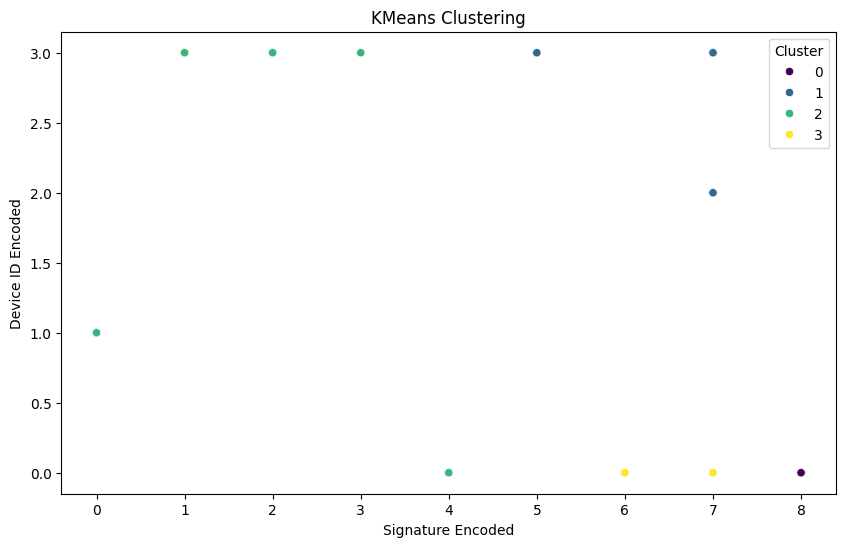

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定圖表大小
plt.figure(figsize=(10, 6))

# 繪製散點圖，使用不同顏色表示不同的聚類
sns.scatterplot(x='signature_encoded', y='deviceid_encoded',
                hue='cluster', data=df, palette='viridis')

# 添加圖表標題和軸標籤
plt.title('KMeans Clustering')
plt.xlabel('Signature Encoded')
plt.ylabel('Device ID Encoded')

# 顯示圖例
plt.legend(title='Cluster')

# 顯示圖表
plt.show()

In [89]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 選擇要用於聚類的特徵
features_for_clustering = ['source_port_type_encoded', 'destination_port_type_encoded',
                           'source_ip_type_encoded', 'destination_ip_type_encoded']

# 使用 KMeans 進行聚類
kmeans = KMeans(n_clusters=4)  # 可以調整聚類的數量
df['cluster'] = kmeans.fit_predict(df[features_for_clustering])

# 查看聚類結果
print(df['cluster'].value_counts())


# 箱型圖展示每個聚類的特徵分佈
sns.boxplot(x='cluster', y='some_feature', data=df)
plt.title('Distribution of Some Feature Across Clusters')
plt.show()

cluster
0    8997
1     980
2      18
3       5
Name: count, dtype: int64


d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ValueError: Could not interpret value `some_feature` for `y`. An entry with this name does not appear in `data`.

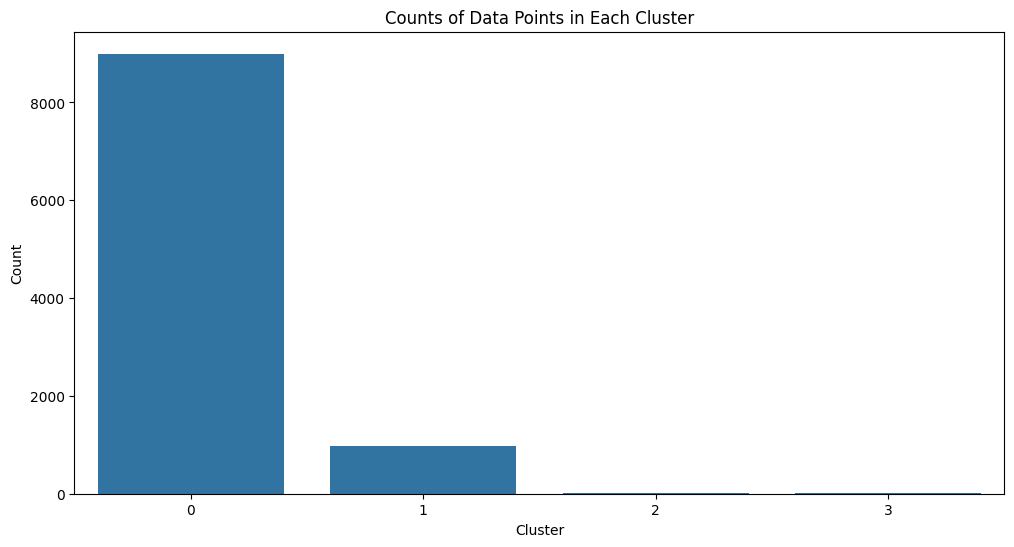

In [ ]:
# 可視化聚類結果
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', data=df)
plt.title('Counts of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

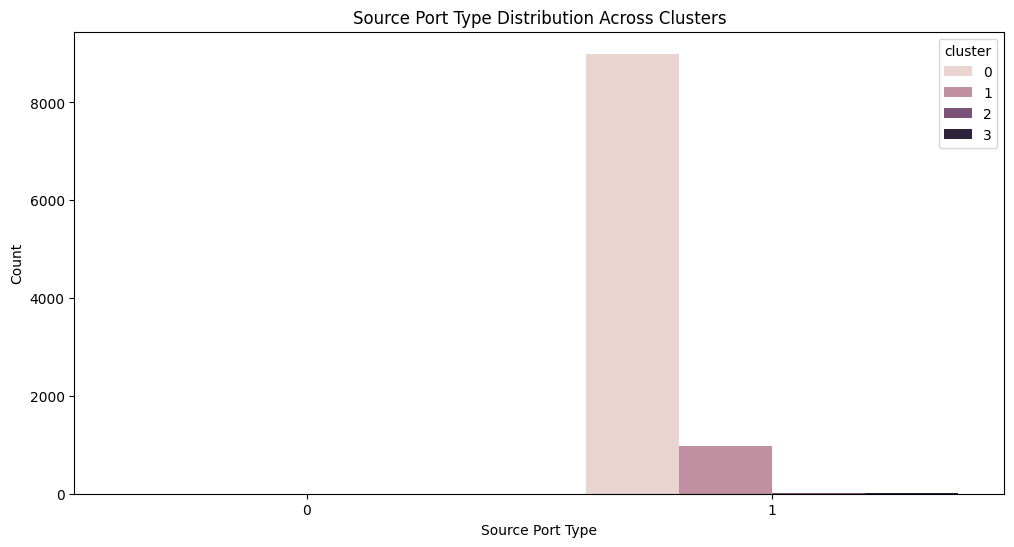

In [ ]:
# 為了更好的視覺效果，您可以單獨繪製每個特徵與聚類的關係
plt.figure(figsize=(12, 6))
sns.countplot(x='source_port_type_encoded', hue='cluster', data=df)
plt.title('Source Port Type Distribution Across Clusters')
plt.xlabel('Source Port Type')
plt.ylabel('Count')
plt.show()

AICTD

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加載數據
df = pd.read_csv('./data/2023-12-24_severity_1.csv')

# 基本數據探索
print(df.head())

           Timestamp       Src IP  Src Port         Dest IP  Dest Port Proto  \
0  12/24/23 11:59 PM  10.8.80.169     32653         8.8.8.8         53   UDP   
1  12/24/23 11:58 PM   10.0.5.230     63855  45.133.238.117         53   UDP   
2  12/24/23 11:57 PM   10.0.5.230     54136  45.133.238.117         53   UDP   
3  12/24/23 11:57 PM  10.8.80.169      3604         8.8.8.8         53   UDP   
4  12/24/23 11:57 PM   10.0.5.230     54136    8.217.48.154         53   UDP   

                                           Signature  \
0   ET POLICY possible Xiaomi phone data leakage DNS   
1  ET DNS Non-DNS or Non-Compliant DNS traffic on...   
2  ET DNS Non-DNS or Non-Compliant DNS traffic on...   
3   ET POLICY possible Xiaomi phone data leakage DNS   
4        ET MALWARE Win32/PlugX Variant CnC Activity   

                                Category  Severity  \
0  Potential Corporate Privacy Violation         1   
1  Potential Corporate Privacy Violation         1   
2  Potential Corpora

In [ ]:
import pandas as pd
# 重點關注的 IP 地址
focus_ips = {
    '192.168.0.210',
    '192.168.0.81',
    '10.0.2.176',
    '10.0.3.144',
    '10.0.5.230'
}

def mark_focus_ips(ip):
    return 'Focus' if ip in focus_ips else 'Non-focus'


# 假設 df 是您的 DataFrame
df['Src IP Focus'] = df['Src IP'].apply(mark_focus_ips)

print(df[['Timestamp', 'Src IP', 'Src IP Focus']].head())

           Timestamp       Src IP Src IP Focus
0  12/24/23 11:59 PM  10.8.80.169    Non-focus
1  12/24/23 11:58 PM   10.0.5.230        Focus
2  12/24/23 11:57 PM   10.0.5.230        Focus
3  12/24/23 11:57 PM  10.8.80.169    Non-focus
4  12/24/23 11:57 PM   10.0.5.230        Focus


In [ ]:
df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type,Src IP Focus
0,12/24/23 11:59 PM,10.8.80.169,32653,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Non-focus
1,12/24/23 11:58 PM,10.0.5.230,63855,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert,Focus
2,12/24/23 11:57 PM,10.0.5.230,54136,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert,Focus
3,12/24/23 11:57 PM,10.8.80.169,3604,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Non-focus
4,12/24/23 11:57 PM,10.0.5.230,54136,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",2036499,alert,Focus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,12/24/23 12:10 AM,10.0.3.7,34325,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Non-focus
7561,12/24/23 12:06 AM,10.0.3.7,43108,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Non-focus
7562,12/24/23 12:05 AM,10.0.3.7,57972,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Non-focus
7563,12/24/23 12:02 AM,10.0.3.7,46540,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Non-focus
